# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Monday 30 December 2019 UTC

In [2]:
fcLow = 200;
fcHigh = 2600;

In [3]:
sampleRate = 16000;
numPeriods = 10;
period = numPeriods;
T = 0:1/sampleRate:period;

In [4]:
for iter = 1:1:150
  printf("iter: %d\n", iter);
  Sigfilename = sprintf("Sig_%d.mat", iter);
  if (2 != exist (Sigfilename, "file"))
    break
  else
    load(Sigfilename)
  endif
  
  max(abs(Sig))
  iter++;
endfor

iter: 1
ans =  5.0877
iter: 2
ans =  8.4277
iter: 3
ans =  10.994
iter: 4
ans =  12.808
iter: 5
ans =  14.850
iter: 6
ans =  16.778
iter: 7
ans =  19.419
iter: 8
ans =  20.937
iter: 9
ans =  22.375
iter: 10
ans =  23.670
iter: 11
ans =  24.814
iter: 12
ans =  26.770
iter: 13
ans =  27.543
iter: 14
ans =  29.035
iter: 15
ans =  30.518
iter: 16
ans =  31.677
iter: 17
ans =  32.956
iter: 18
ans =  34.508
iter: 19
ans =  35.707
iter: 20
ans =  37.020
iter: 21
ans =  38.759
iter: 22
ans =  39.394
iter: 23
ans =  40.426
iter: 24
ans =  41.574
iter: 25
ans =  42.075
iter: 26
ans =  42.473
iter: 27
ans =  43.253
iter: 28
ans =  44.580
iter: 29
ans =  44.637
iter: 30


In [5]:
# Repeat Sig to expand it to numPeriods
Sig = [(Sig(1:end-1)' * ones(1, numPeriods))(:)', Sig(1)];

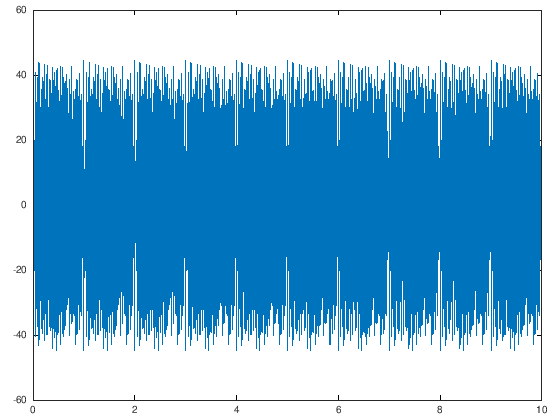

In [6]:
plot(T, Sig)

In [7]:
RC = (1 - cos(2*pi*T/period))/2;

In [8]:
E_cos_pulse = fftshift(fft(RC .* Sig, sampleRate*period*10 + 1));
# E_cos_pulse = fftshift(fft(RC .* Sig));
F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));

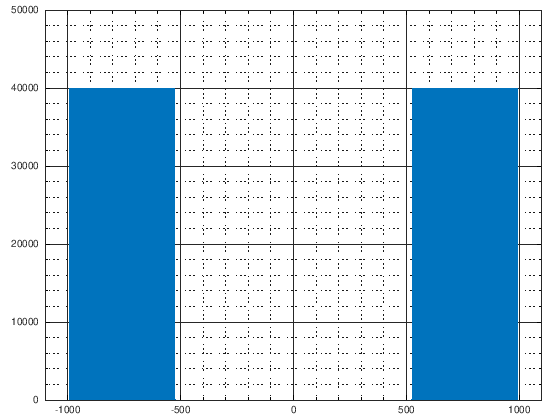

In [9]:
plot(F_base, abs(E_cos_pulse))
grid on
grid minor
axis([-1000-100 1000+100], "tic")